In [140]:
import numpy as np
import pandas as pd

SIZE = 100
ITERS = 100

In [141]:
def M(mat):
    return mat.shape[0] * np.max(np.abs(mat))

In [142]:
def test_M(m_A, m_B):
    M_A = M(m_A)
    M_B = M(m_B)
    M_AB = M(m_A @ m_B)
    
    return M_A, M_B, M_A * M_B, M_AB, M_AB <= M_A * M_B
    
    print(f"M(A): {M_A}, M(B): {M_B}, M(AB): {M_AB}")
    print(f"M(AB) <= M(A) * M(B): {M_AB <= M_A * M_B}")

In [143]:
df = pd.DataFrame(columns=["M(A)", "M(B)", "M(A) * M(B)", "M(AB)", "M(AB) <= M(A) * M(B)"], index=range(ITERS))

df

,M(A),M(B),M(A) * M(B),M(AB),M(AB) <= M(A) * M(B)
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN


In [144]:
for index in range(ITERS):
    A = np.random.rand(SIZE, SIZE)
    B = np.random.rand(SIZE, SIZE)
    
    df.loc[index] = test_M(A, B)

df

,M(A),M(B),M(A) * M(B),M(AB),M(AB) <= M(A) * M(B)
0,99.996224,99.994551,9999.077547,3214.673301,True
1,99.994444,99.998791,9999.323545,3428.798453,True
2,99.996851,99.995846,9999.269741,3235.566497,True
3,99.987535,99.992437,9997.997301,3297.543449,True
4,99.998847,99.995416,9999.426297,3220.727398,True
...,...,...,...,...,...
95,99.98265,99.996708,9997.93585,3438.418743,True
96,99.986845,99.985636,9997.248215,3343.521114,True
97,99.99771,99.990635,9998.834577,3386.556085,True
98,99.996491,99.995236,9999.172738,3412.10229,True


In [145]:
df[df["M(AB) <= M(A) * M(B)"] == False].count()
# Везде неравенство выполняется

M(A)                    0
M(B)                    0
M(A) * M(B)             0
M(AB)                   0
M(AB) <= M(A) * M(B)    0
dtype: int64

In [146]:
import matplotlib.pyplot as plt

<Figure size 1800x1000 with 0 Axes>

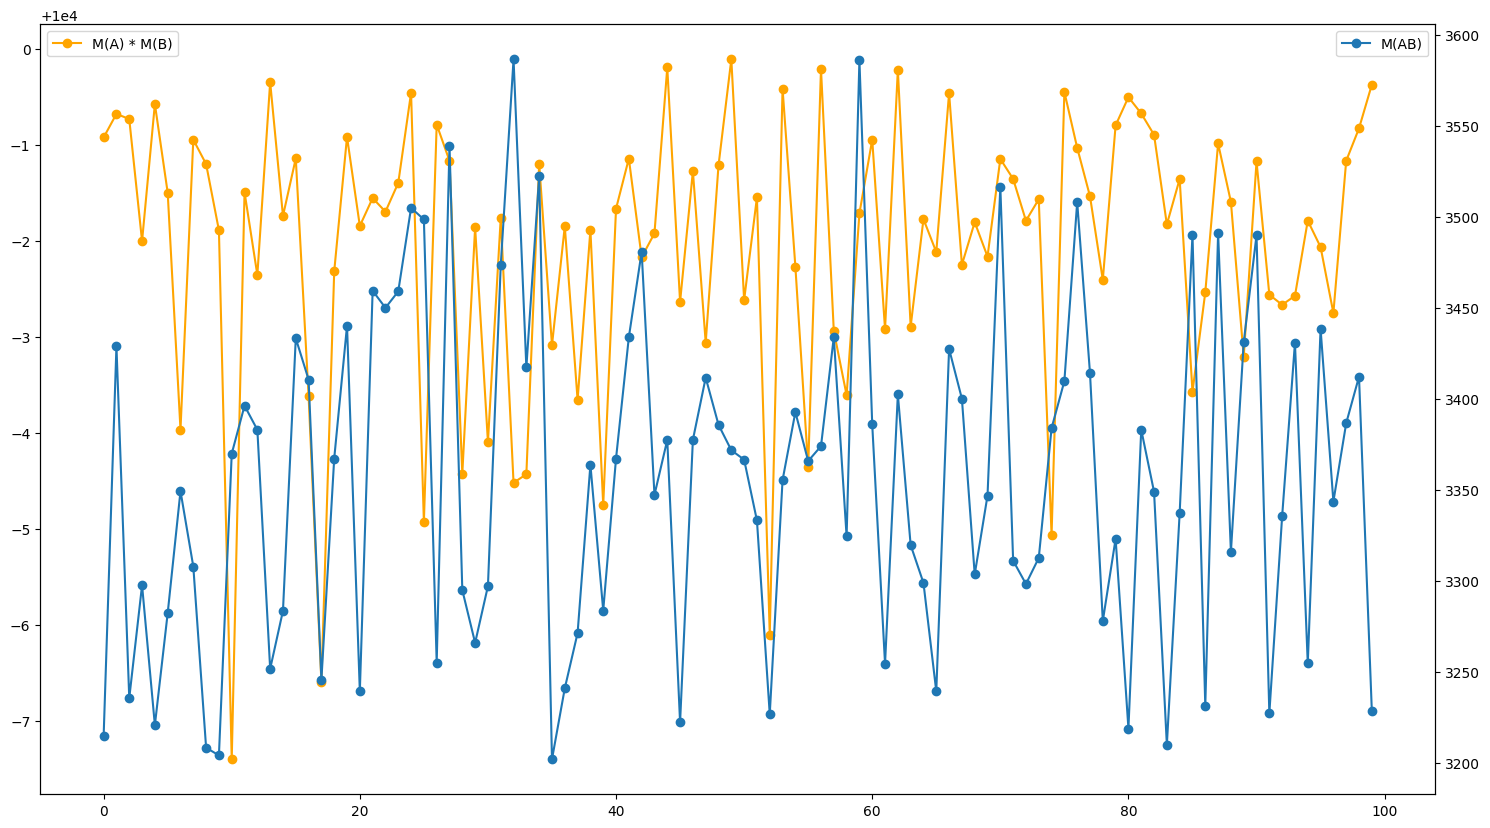

In [147]:
# График с двумя осями
plt.figure(figsize=(18, 10))

fig, ax1 = plt.subplots(figsize=(18, 10))

ax1.plot(df["M(A) * M(B)"], label="M(A) * M(B)", color="orange", marker="o")
ax2 = ax1.twinx()
ax2.plot(df["M(AB)"], label="M(AB)", marker="o")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")


plt.show()

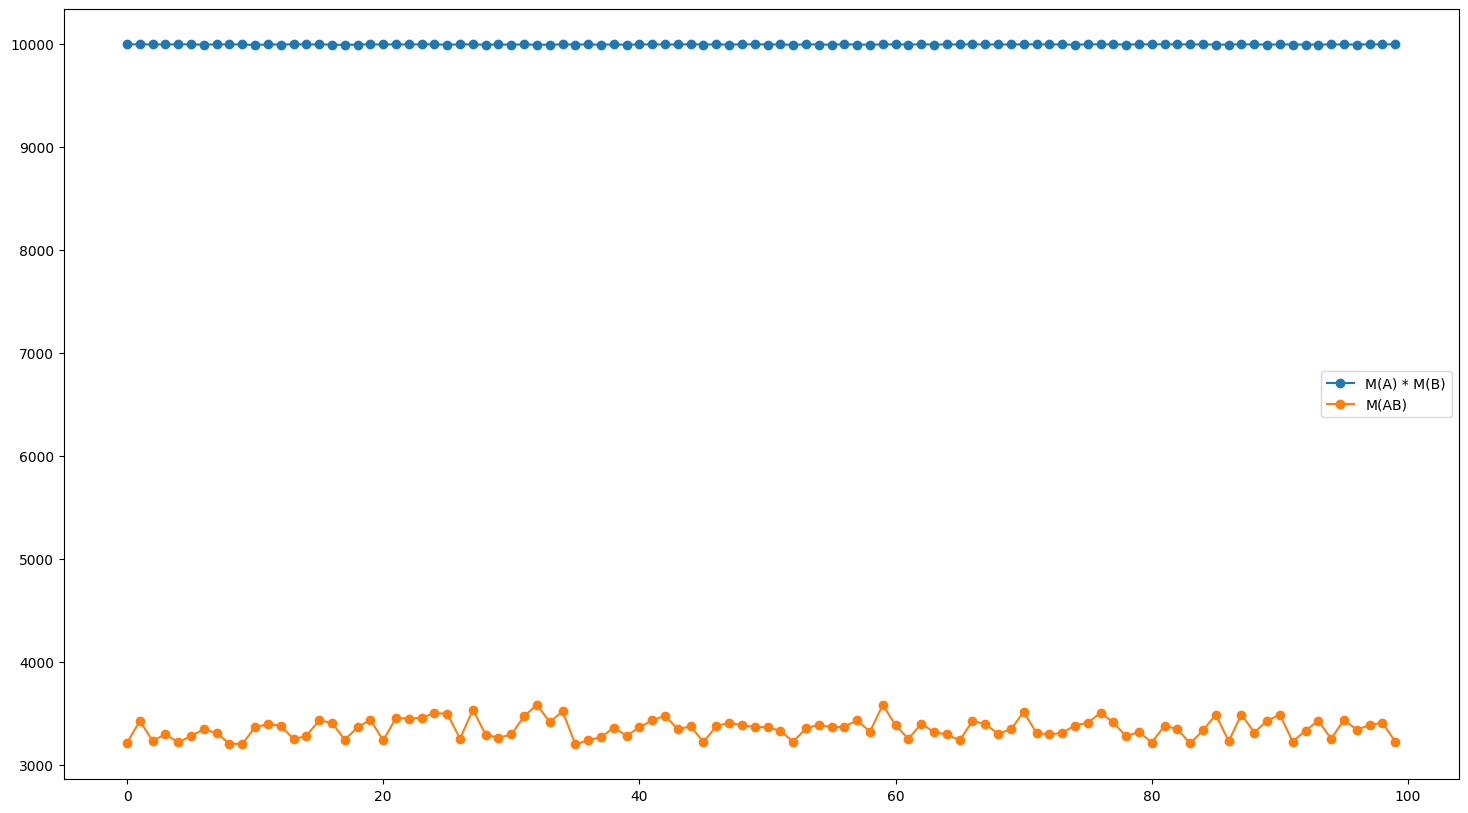

In [148]:
# График с одной осью
plt.figure(figsize=(18, 10))

plt.plot(df["M(A) * M(B)"], label="M(A) * M(B)", marker="o")
plt.plot(df["M(AB)"], label="M(AB)", marker="o")
plt.legend()

plt.savefig('img/task1.png', dpi=300, bbox_inches='tight')